### Approximating $\sin(x)$ on $(0, 1)$ Using a Feedforward Neural Network in PyTorch.

Epoch 0, Loss: 0.762094
Epoch 50, Loss: 0.003642
Epoch 100, Loss: 0.000548
Epoch 150, Loss: 0.000150
Epoch 200, Loss: 0.000029
Epoch 250, Loss: 0.000014
Epoch 300, Loss: 0.000009
Epoch 350, Loss: 0.000007
Epoch 400, Loss: 0.000005
Epoch 450, Loss: 0.000004


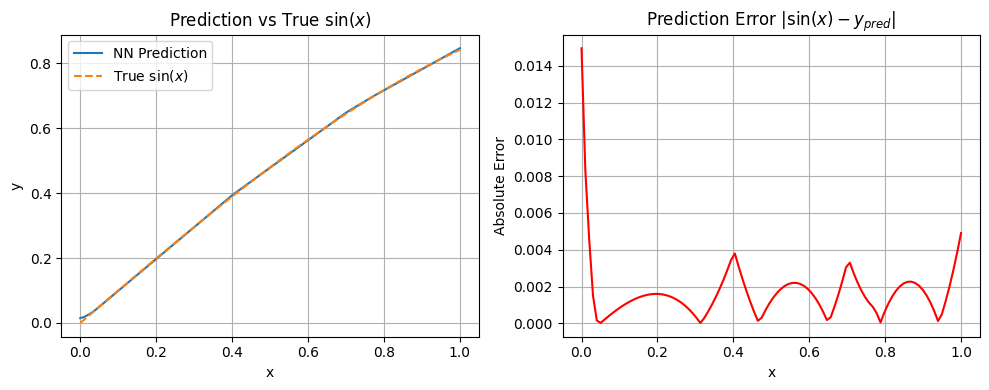

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

#training data in (0, 1)
x_train = torch.linspace(0.01, 0.99, 100).unsqueeze(1)
y_train = torch.sin(x_train)

# Define the same neural network
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.net = nn.Sequential(
            nn.Linear(1, 32),
            nn.ReLU(),
            nn.Linear(32, 32),
            nn.ReLU(),
            nn.Linear(32, 1)
        )

    def forward(self, x):
        return self.net(x)

# Model setup
model = Net()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Training loop
epochs = 500
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    output = model(x_train)
    loss = criterion(output, y_train)
    loss.backward()
    optimizer.step()

    if epoch % 50 == 0:
        print(f"Epoch {epoch}, Loss: {loss.item():.6f}")

# Evaluate the model
model.eval()
x_test = torch.linspace(0.0, 1.0, 100).unsqueeze(1)
y_true = torch.sin(x_test)
y_pred = model(x_test).detach()
error = torch.abs(y_pred - y_true)

# Plot predictions vs true values
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.plot(x_test.numpy(), y_pred.numpy(), label='NN Prediction')
plt.plot(x_test.numpy(), y_true.numpy(), label='True $\sin(x)$', linestyle='--')
plt.xlabel("x")
plt.ylabel("y")
plt.title("Prediction vs True $\sin(x)$")
plt.legend()
plt.grid(True)

# Plot absolute error
plt.subplot(1, 2, 2)
plt.plot(x_test.numpy(), error.numpy(), color='red')
plt.xlabel("x")
plt.ylabel("Absolute Error")
plt.title("Prediction Error $|\\sin(x) - y_{pred}|$")
plt.grid(True)

plt.tight_layout()
plt.show()


### Approximating $x^2$ on $(0, 1)$ Using a Feedforward Neural Network in PyTorch.

Epoch 0, Loss: 0.191456
Epoch 50, Loss: 0.000663
Epoch 100, Loss: 0.000099
Epoch 150, Loss: 0.000063
Epoch 200, Loss: 0.000048
Epoch 250, Loss: 0.000038
Epoch 300, Loss: 0.000031
Epoch 350, Loss: 0.000025
Epoch 400, Loss: 0.000021
Epoch 450, Loss: 0.000017


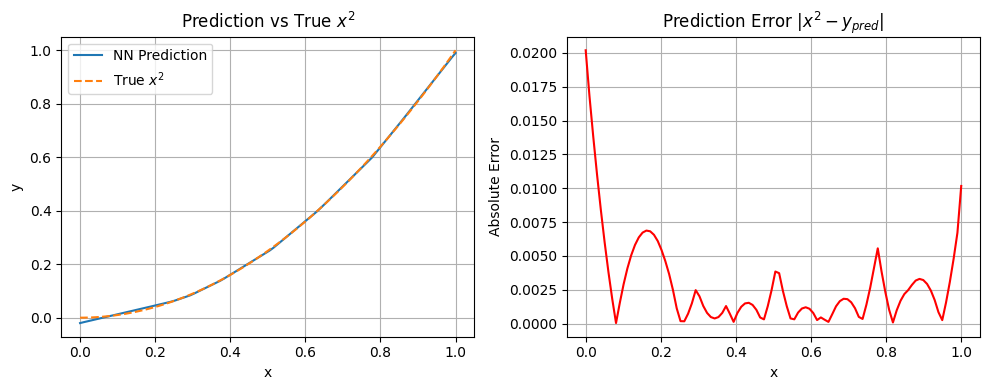

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

# Generate training data in (0, 1)
x_train = torch.linspace(0.01, 0.99, 100).unsqueeze(1)
y_train = x_train ** 2  # Target: x^2

# Define the neural network
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.net = nn.Sequential(
            nn.Linear(1, 32),
            nn.ReLU(),
            nn.Linear(32, 32),
            nn.ReLU(),
            nn.Linear(32, 1)
        )

    def forward(self, x):
        return self.net(x)

# Setup model
model = Net()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Train the network
epochs = 500
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    output = model(x_train)
    loss = criterion(output, y_train)
    loss.backward()
    optimizer.step()

    if epoch % 50 == 0:
        print(f"Epoch {epoch}, Loss: {loss.item():.6f}")

# Evaluate the model
model.eval()
x_test = torch.linspace(0.0, 1.0, 100).unsqueeze(1)
y_true = x_test ** 2
y_pred = model(x_test).detach()
error = torch.abs(y_pred - y_true)

# Plot prediction and error
plt.figure(figsize=(10, 4))

# Prediction plot
plt.subplot(1, 2, 1)
plt.plot(x_test.numpy(), y_pred.numpy(), label='NN Prediction')
plt.plot(x_test.numpy(), y_true.numpy(), label='True $x^2$', linestyle='--')
plt.xlabel("x")
plt.ylabel("y")
plt.title("Prediction vs True $x^2$")
plt.legend()
plt.grid(True)

# Error plot
plt.subplot(1, 2, 2)
plt.plot(x_test.numpy(), error.numpy(), color='red')
plt.xlabel("x")
plt.ylabel("Absolute Error")
plt.title("Prediction Error $|x^2 - y_{pred}|$")
plt.grid(True)

plt.tight_layout()
plt.show()


### Training on $(0,1)$ & Testing on $(0,1.5)$ $function$ $f(x)=x^2$

Epoch 0, Loss: 0.375386
Epoch 50, Loss: 0.000437
Epoch 100, Loss: 0.000057
Epoch 150, Loss: 0.000029
Epoch 200, Loss: 0.000019
Epoch 250, Loss: 0.000014
Epoch 300, Loss: 0.000011
Epoch 350, Loss: 0.000009
Epoch 400, Loss: 0.000008
Epoch 450, Loss: 0.000008


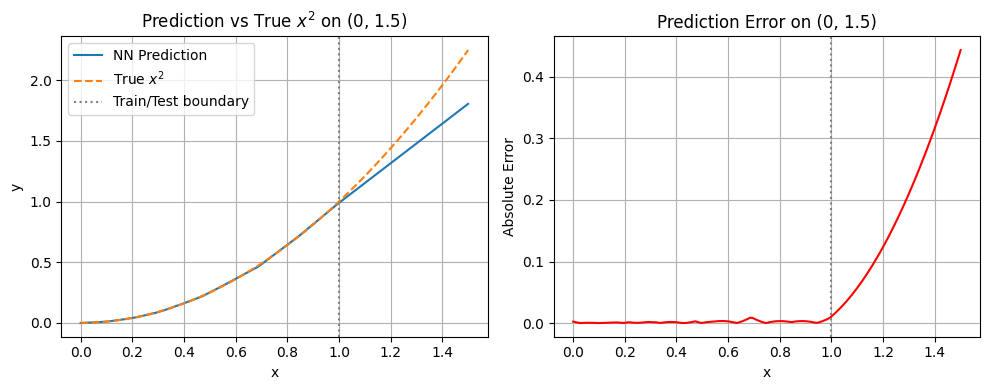

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

#training data in (0, 1)
x_train = torch.linspace(0.01, 0.99, 100).unsqueeze(1)
y_train = x_train ** 2

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.net = nn.Sequential(
            nn.Linear(1, 32),
            nn.ReLU(),
            nn.Linear(32, 32),
            nn.ReLU(),
            nn.Linear(32, 1)
        )

    def forward(self, x):
        return self.net(x)

# Model setup
model = Net()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Train the network
epochs = 500
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    output = model(x_train)
    loss = criterion(output, y_train)
    loss.backward()
    optimizer.step()
    if epoch % 50 == 0:
        print(f"Epoch {epoch}, Loss: {loss.item():.6f}")

# Evaluate on (0, 1.5)
model.eval()
x_test = torch.linspace(0.0, 1.5, 150).unsqueeze(1)
y_true = x_test ** 2
y_pred = model(x_test).detach()
error = torch.abs(y_pred - y_true)

# Plot prediction vs true with extrapolation
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.plot(x_test.numpy(), y_pred.numpy(), label='NN Prediction')
plt.plot(x_test.numpy(), y_true.numpy(), label='True $x^2$', linestyle='--')
plt.axvline(1.0, color='gray', linestyle=':', label='Train/Test boundary')
plt.xlabel("x")
plt.ylabel("y")
plt.title("Prediction vs True $x^2$ on (0, 1.5)")
plt.legend()
plt.grid(True)

# Plot error
plt.subplot(1, 2, 2)
plt.plot(x_test.numpy(), error.numpy(), color='red')
plt.axvline(1.0, color='gray', linestyle=':')
plt.xlabel("x")
plt.ylabel("Absolute Error")
plt.title("Prediction Error on (0, 1.5)")
plt.grid(True)

plt.tight_layout()
plt.show()


# Function Approximation of $\sin(x)$ Using a CNN with Randomized Interval Sampling in PyTorch

Epoch 1: Train Loss=0.5018, Val Loss=0.4678, Test Loss=0.4810
Epoch 2: Train Loss=0.4798, Val Loss=0.4392, Test Loss=0.4424
Epoch 3: Train Loss=0.4393, Val Loss=0.4001, Test Loss=0.4044
Epoch 4: Train Loss=0.3979, Val Loss=0.3630, Test Loss=0.3626
Epoch 5: Train Loss=0.3611, Val Loss=0.3335, Test Loss=0.3313
Epoch 6: Train Loss=0.3341, Val Loss=0.3263, Test Loss=0.3175
Epoch 7: Train Loss=0.3266, Val Loss=0.3114, Test Loss=0.3072
Epoch 8: Train Loss=0.3162, Val Loss=0.2989, Test Loss=0.2981
Epoch 9: Train Loss=0.3050, Val Loss=0.2888, Test Loss=0.2909
Epoch 10: Train Loss=0.2957, Val Loss=0.2776, Test Loss=0.2775
Epoch 11: Train Loss=0.2864, Val Loss=0.3107, Test Loss=0.2971
Epoch 12: Train Loss=0.2796, Val Loss=0.2557, Test Loss=0.2563
Epoch 13: Train Loss=0.2634, Val Loss=0.2443, Test Loss=0.2472
Epoch 14: Train Loss=0.2508, Val Loss=0.2318, Test Loss=0.2366
Epoch 15: Train Loss=0.2390, Val Loss=0.2201, Test Loss=0.2239
Epoch 16: Train Loss=0.2247, Val Loss=0.2067, Test Loss=0.2120
E

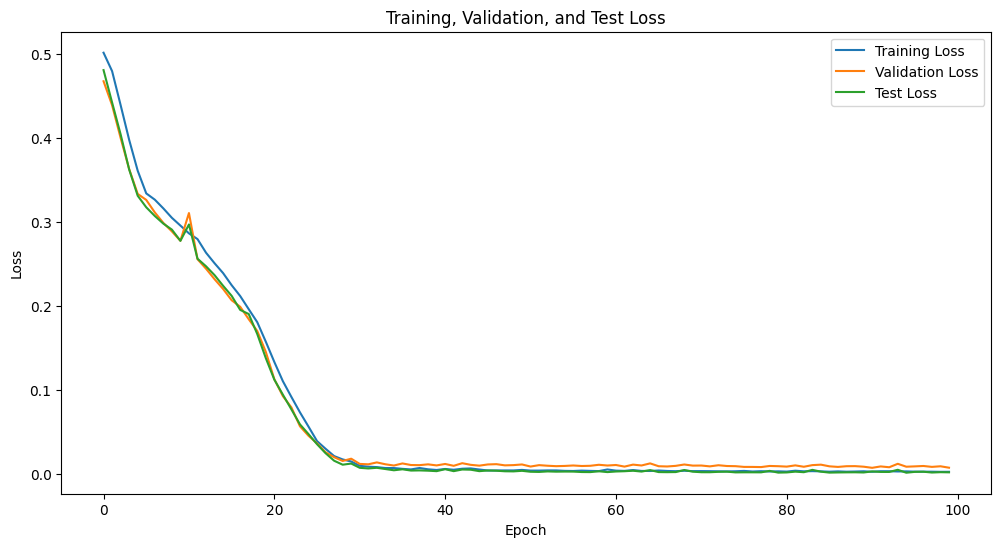

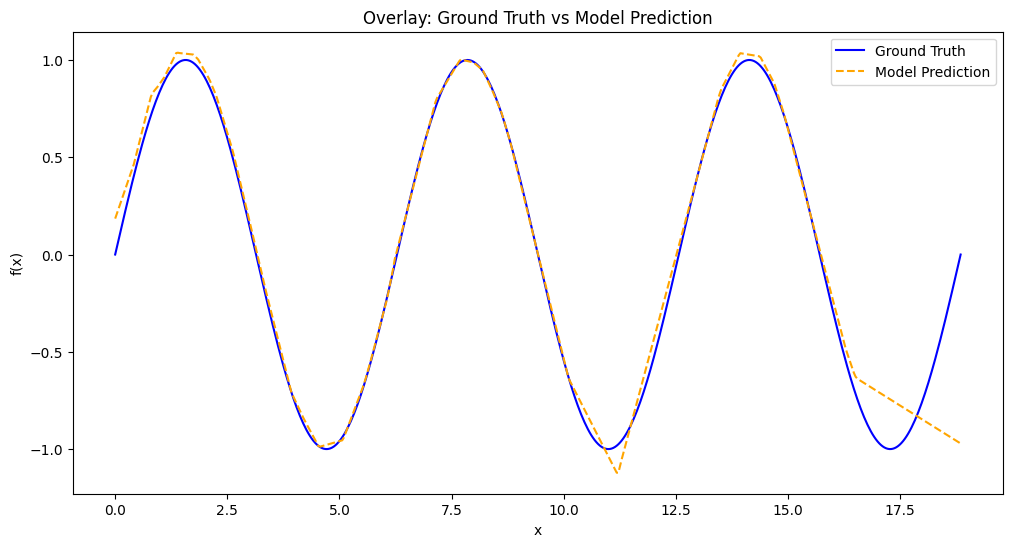

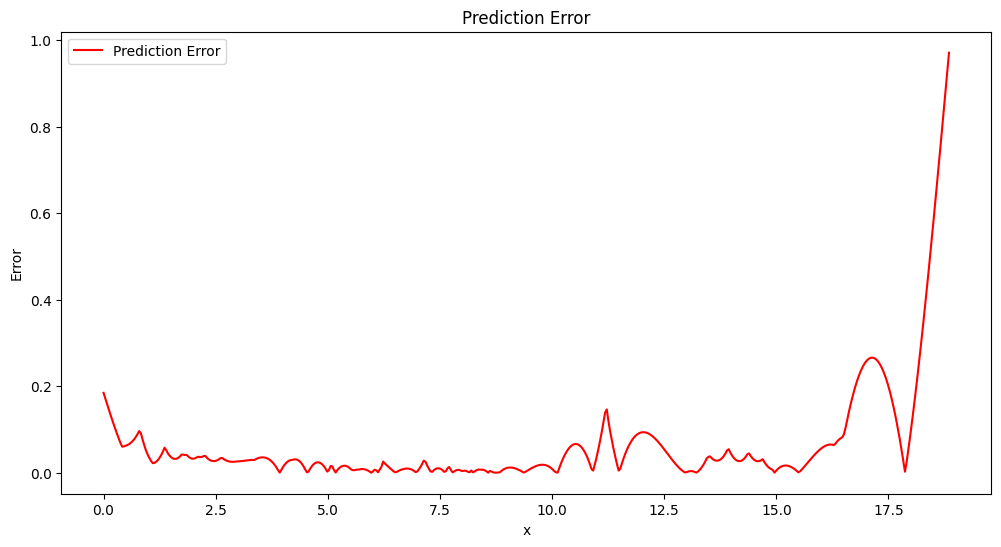

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader, random_split

# Define the target function
def target_function(x):
    return np.sin(x)

# Generate data
def generate_intervals(start, end, interval_length, num_intervals, points_per_interval):
    intervals = []
    for _ in range(num_intervals):
        start_point = np.random.uniform(start, end - interval_length)
        end_point = start_point + interval_length
        x = np.linspace(start_point, end_point, points_per_interval)
        y = target_function(x)
        intervals.append((x, y))
    return intervals

train_intervals = generate_intervals(0, 6 * np.pi, 2 * np.pi, 100, 50)

# Dataset class for all sets
class SinDataset(Dataset):
    def __init__(self, intervals):
        self.data = np.concatenate([x for x, _ in intervals])
        self.targets = np.concatenate([y for _, y in intervals])
        self.data = torch.tensor(self.data, dtype=torch.float32).view(-1, 1, 1)
        self.targets = torch.tensor(self.targets, dtype=torch.float32).view(-1, 1)

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        return self.data[idx], self.targets[idx]

# Prepare full dataset
full_dataset = SinDataset(train_intervals)

# Calculate sizes for 80% train, 10% val, 10% test
total_size = len(full_dataset)
train_size = int(0.8 * total_size)
val_size = int(0.1 * total_size)
test_size = total_size - train_size - val_size

# Split dataset
train_dataset, val_dataset, test_dataset = random_split(full_dataset, [train_size, val_size, test_size])

# DataLoaders
batch_size = 64
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Define the CNN model
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv1d(1, 16, kernel_size=3, padding=1)
        self.conv2 = nn.Conv1d(16, 32, kernel_size=3, padding=1)
        self.conv3 = nn.Conv1d(32, 64, kernel_size=3, padding=1)
        self.fc = nn.Linear(64, 1)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.conv1(x))
        x = self.relu(self.conv2(x))
        x = self.relu(self.conv3(x))
        x = x.mean(dim=-1)  # Global average pooling
        x = self.fc(x)
        return x

# Initialize model, loss function, optimizer
model = SimpleCNN()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop with train, val, test loss calculation
best_val_loss = float('inf')
train_losses, val_losses, test_losses = [], [], []
best_model_path = "best_model.pth"

for epoch in range(100):
    # Training phase
    model.train()
    train_loss = 0
    for x_batch, y_batch in train_loader:
        optimizer.zero_grad()
        preds = model(x_batch)
        loss = criterion(preds, y_batch)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
    train_loss /= len(train_loader)
    train_losses.append(train_loss)

    # Validation phase
    model.eval()
    val_loss = 0
    with torch.no_grad():
        for x_batch, y_batch in val_loader:
            preds = model(x_batch)
            loss = criterion(preds, y_batch)
            val_loss += loss.item()
    val_loss /= len(val_loader)
    val_losses.append(val_loss)

    # Test phase (evaluate test loss every epoch)
    test_loss = 0
    with torch.no_grad():
        for x_batch, y_batch in test_loader:
            preds = model(x_batch)
            loss = criterion(preds, y_batch)
            test_loss += loss.item()
    test_loss /= len(test_loader)
    test_losses.append(test_loss)

    # Save best model based on validation loss
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        torch.save(model.state_dict(), best_model_path)

    print(f"Epoch {epoch+1}: Train Loss={train_loss:.4f}, Val Loss={val_loss:.4f}, Test Loss={test_loss:.4f}")

# Load best model for final evaluation
model.load_state_dict(torch.load(best_model_path))
model.eval()

# Generate test data for final plot (same x_test as before)
x_test = np.linspace(0, 6 * np.pi, 500)
y_test = target_function(x_test)
x_test_tensor = torch.tensor(x_test, dtype=torch.float32).view(-1, 1, 1)

# Predict on test data
with torch.no_grad():
    y_pred_tensor = model(x_test_tensor).numpy().flatten()

# Calculate final error
error = np.abs(y_test - y_pred_tensor)

# Plot losses for train, val, test
plt.figure(figsize=(12, 6))
plt.plot(train_losses, label="Training Loss")
plt.plot(val_losses, label="Validation Loss")
plt.plot(test_losses, label="Test Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training, Validation, and Test Loss")
plt.legend()
plt.show()

# Overlay plot: Ground truth vs Model Prediction
plt.figure(figsize=(12, 6))
plt.plot(x_test, y_test, label="Ground Truth", color="blue")
plt.plot(x_test, y_pred_tensor, label="Model Prediction", color="orange", linestyle="dashed")
plt.title("Overlay: Ground Truth vs Model Prediction")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.show()

# Error plot
plt.figure(figsize=(12, 6))
plt.plot(x_test, error, label="Prediction Error", color="red")
plt.title("Prediction Error")
plt.xlabel("x")
plt.ylabel("Error")
plt.legend()
plt.show()
